In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [ ]:
start = '2010-01-01'
end=date.today()

data=yf.download("AAPL",start,end)
data.reset_index(inplace=True)
data

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800
...,...,...,...,...,...,...,...
3513,2023-12-18,196.089996,196.630005,194.389999,195.889999,195.889999,55751900
3514,2023-12-19,196.160004,196.949997,195.889999,196.940002,196.940002,40714100
3515,2023-12-20,196.899994,197.679993,194.830002,194.830002,194.830002,52242800
3516,2023-12-21,196.100006,197.080002,193.500000,194.679993,194.679993,46482500


In [ ]:
mv_100_days=data.Close.rolling(100).mean()

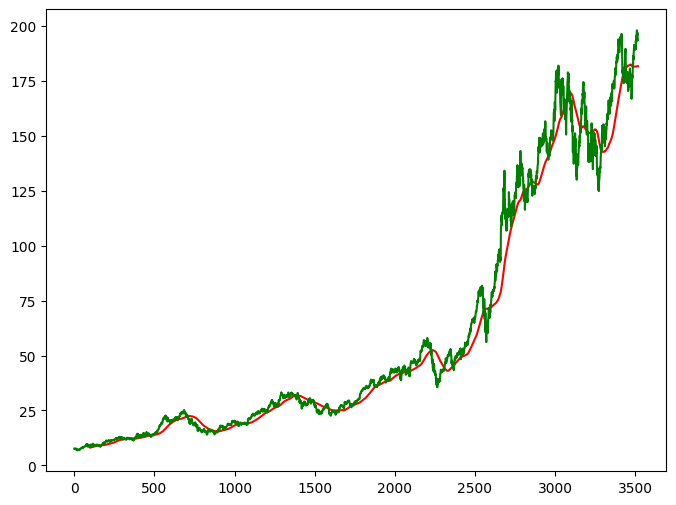

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(mv_100_days,'r')
plt.plot(data.Close,'g')

In [ ]:
mv_200_days=data.Close.rolling(200).mean()

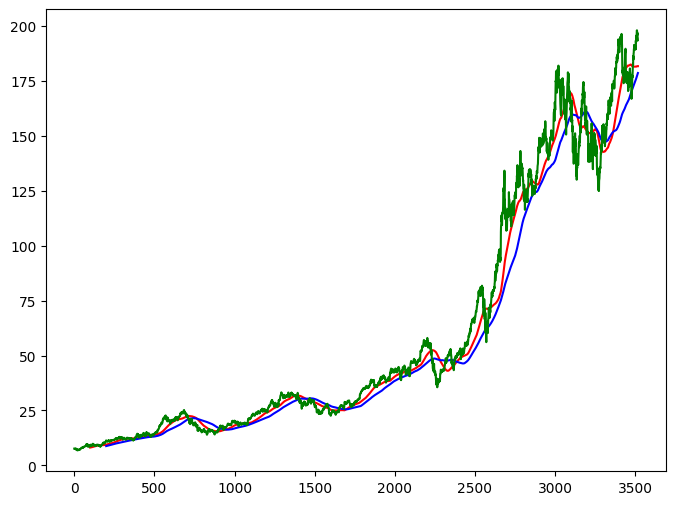

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(mv_100_days,'r')
plt.plot(mv_200_days,'b')
plt.plot(data.Close,'g')

In [ ]:
data.dropna(inplace=True)

splitting

In [ ]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.8)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.8):int(len(data))])
print(data_train.shape)
print(data_test.shape)

(2814, 1)
(704, 1)


In [ ]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_array=scaler.fit_transform(data_train)
data_train_array.shape

(2814, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(100,data_train_array.shape[0]):
  x_train.append(data_train_array[i-100:i])
  y_train.append(data_train_array[i,0])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

### **ML MODEL**

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x_train.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
85/85 [==============================] - 38s 379ms/step - loss: 0.0149
Epoch 2/50
85/85 [==============================] - 25s 290ms/step - loss: 0.0035
Epoch 3/50
85/85 [==============================] - 27s 314ms/step - loss: 0.0038
Epoch 4/50
85/85 [==============================] - 25s 297ms/step - loss: 0.0032
Epoch 5/50
85/85 [==============================] - 25s 299ms/step - loss: 0.0025
Epoch 6/50
85/85 [==============================] - 25s 300ms/step - loss: 0.0023
Epoch 7/50
85/85 [==============================] - 24s 279ms/step - loss: 0.0022
Epoch 8/50
85/85 [==============================] - 25s 297ms/step - loss: 0.0017
Epoch 9/50
85/85 [==============================] - 25s 294ms/step - loss: 0.0022
Epoch 10/50
85/85 [==============================] - 25s 300ms/step - loss: 0.0020
Epoch 11/50
85/85 [==============================] - 24s 288ms/step - loss: 0.0021
Epoch 12/50
85/85 [==============================] - 24s 281ms/step - loss: 0.0022
Epoch 13/50
8

In [ ]:
model.save("keras_model.h5")

In [ ]:
data_test.head()

,Close
2814,119.980003
2815,121.959999
2816,121.029999
2817,123.989998
2818,125.570000


In [ ]:
past_100_days=data_train.tail(100)

In [ ]:
final_df=past_100_days.append(data_test,ignore_index=True)

<ipython-input-20-f3fd9580a1f0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [ ]:
final_df.head()

,Close
0,121.190002
1,120.709999
2,119.019997
3,115.980003
4,117.510002


In [ ]:
input_data=scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(804, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(704, 100, 1)
(704,)


###**MAKING PREDICTION**

In [ ]:
y_predicted=model.predict(x_test)

22/22 [==============================] - 2s 82ms/step


In [ ]:
y_predicted.shape

(704, 1)

In [ ]:
y_predicted

In [ ]:
scaler.scale_

array([0.01119319])

In [ ]:
scale_factor=1/0.01270721
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

In [ ]:
y_predicted.shape

(704, 1)

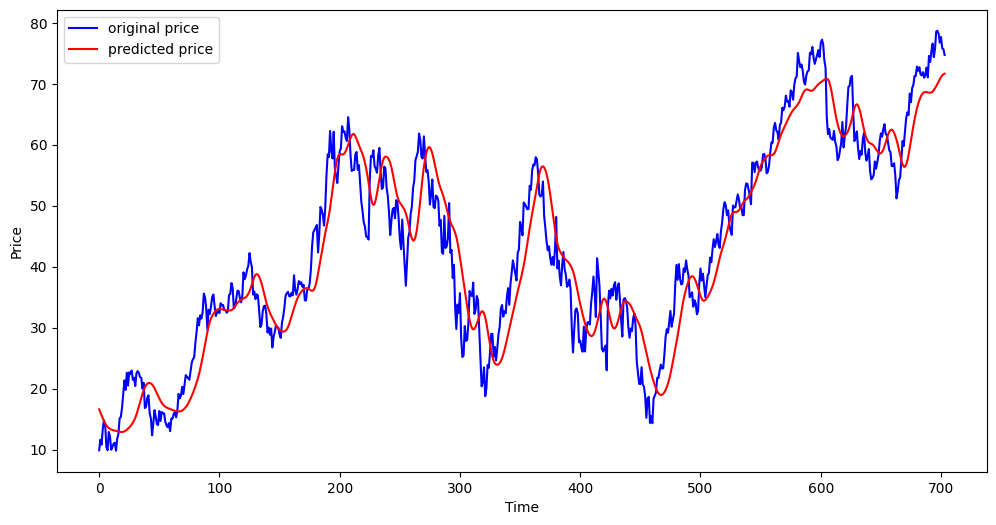

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()